# The Algebra and Geometry of the Axioms of Unsupervised Evaluation

In [2]:
import itertools, random
import sympy
from IPython.display import display,Math,Latex, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import ntqr
import ntqr.raxioms
sympy.init_session()
sympy.init_printing(latex_mode='equation')

IPython console for SymPy 1.13.3 (Python 3.11.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.3/



## Introduction

This notebook explains the algebra and geometry of the axioms of unsupervised evaluation for N test-takers that answer Q questions that have R choices. This is done using the terminology of Algebraic Geometry. Every subset of the N test-takers of size M is associated with a polynomial ideal represented by a set of R equations, one for each response label. This is the algebraic side of the logic of unsupervised evaluation. These ideals define a set of evaluation points - called **varieties** - that are logically consistent with how the M-sized subset responded to the test. These evaluation points exist in simplexes of the possible integer values for response tuples by true label. This is the geometric side of the logic of unsupervised evaluation.

Explaining the geometry is combinatorially hard but can be understood by focusing on a single "point" in the space. The first portion of
that space describes the unknown statistics of the test -- mainly how many times do each of the labels appear on the test.

## The answer key Q-simplex

Any given test exists as a single point in the Q-simplex: all tuples of the form $(Q_{\ell_1}, Q_{\ell_2}, \ldots, Q_{\ell_R}).$
The tuples lie on a simplex in an $R$-dimensional space because they must satisfy the equation,
\begin{equation}
\sum_{\ell \in \mathcal{L}} Q_\ell = Q.
\end{equation}
Denoting the space of the integers from 0 to $Q$ by $\mathbb{Q}_Q,$ the Q-simplex lies inside the hypercube of integers denoted by $\mathbb{Q}_Q^R.$

All statements about logical consistency between test-taker evaluation occur at a single point in the Q-simplex. It makes no sense to compare evaluations at different values of the Q-simplex since any given test can only occupy one point in the Q-simplex. Consequently,
the logic works in a ladder-like manner. Once we pick a value for the Q-tuple, we can find all single classifier evaluations consistent with individual response statistics. These are the $M=1$ evaluation axioms. This is the next step in the ladder of constructing the evaluation space for $N$ test-takers.

## The M=1 R-simplexes

Given a value of the Q tuple, $(Q_{\ell_1}, Q_{\ell_2}, \ldots, Q_{\ell_R}),$ we can ask what evaluations for a single test-taker  $i$ are consistent with the observed label responses the test taker. These are denoted by the response variables,
\begin{equation}
\{ R_{\ell_i} \}_{\ell_i \in \mathcal{L}}
\end{equation}
What we seek are the values of the responses by true label that are consistent with these label responses by the test taker. These are the M-subset label responses variables. In the case of ($M=1$) these are of the form,
\begin{equation}
\{ R_{\ell_i,\ell_\text{true}} \}_{\ell_i \in \mathcal{L}},
\end{equation}
for each of the R labels. These must also live on a simplex since for any $\ell_{\text{true}}$ we must have the identity,
\begin{equation}
\sum_{\ell_i \in \mathcal{L}}  R_{\ell_i,\ell_\text{true}} = R_{\ell_\text{true}}.
\end{equation}
The M=1 simplex for a single test taker is thus in a produc of spaces, one for each label,
\begin{equation}
(\mathbb{R}_{Q_{\ell_1}}^1) \otimes (\mathbb{R}_{Q_{\ell_2}}^1) \otimes \ldots (\mathbb{R}_{Q_{\ell_R}}^1).
\end{equation}

## The M=2 R-simplexes

The M=2 R-simplexes exist for all pairs of N test-takers. These are now using the evidence in how a pair responded jointly to test questions. These are the response variables of the form $R_{\ell_i, \ell_j}$. And the unknown label response statistics we seek are of the form,
\begin{equation}
\{ R_{\ell_i, \ell_j, \ell_\text{true}} \}_{\ell_i, \ell_j \in \mathcal{L}},
\end{equation}
These also lie on a simplex in a space that can be represented as,
\begin{equation}
(\mathbb{R}_{Q_{\ell_1}}^2) \otimes (\mathbb{R}_{Q_{\ell_2}}^2) \otimes \ldots (\mathbb{R}_{Q_{\ell_R}}^2).
\end{equation}
## The general M=m R-simplexes

In general, for every M-sized subset of N test-takers, we require a response space of the form,
\begin{equation}
(\mathbb{R}_{Q_{\ell_1}}^M) \otimes (\mathbb{R}_{Q_{\ell_2}}^M) \otimes \ldots (\mathbb{R}_{Q_{\ell_R}}^M).
\end{equation}
## The role of the axioms in defining the variety of logically consistent group evaluations

All the M R-simplexes define the set of all possible evaluations for N test takers given its size Q. But once we observe test responses, the set of evaluations logically consistent with those responses is much smaller than the R-simplexes. This is accomplished by filtering out all M-subset evaluations that do not satisfy the evaluation axioms up to M.

Restricting ourselves to the space of single test-taker label responses, a space of dimension $R*N,$ the M=1 axioms define the largest variety possible in this space. The M=2 axioms, being additional algebraic constraints, are thus a subset of this variety. This follows from the well-known idea in Algebraic Geometry that the variety of a large polynomial ideal is equal or smaller than the variety associated with a subset of that ideal.

## Examples of the M=1 axioms

Starting in NTQR v0.5, M=1 axioms for any number of labels, R, are supported. The axioms are of the form,
\begin{equation}
Q_{\ell_{\text{true}}} 
- R_{(\ell_{\text{true}})_i} 
- \sum_{\ell_e \in \text{errors}(\ell_{\text{true}})} R_{(\ell_e)_i, \ell_{\text{true}}}
+ \sum_{\ell_e \neq \ell_{\text{true}}} R_{(\ell_{\text{true}})_i, \ell_e}
\end{equation}
for every $\ell_{\text{true}} \in (\ell_1, \ell_2, \ldots, \ell_r)$ and $i \in (c_1, c_2, \ldots, c_N).$

('l',)


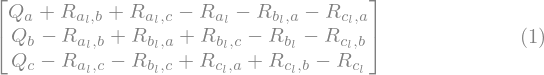

In [4]:
N=4
labels = ('a','b','c',)
classifiers = ('i','j','k','l')
m_1_ideals = ntqr.raxioms.MAxiomsIdeal(labels,classifiers,1)
any_classifier = random.choice(list(itertools.combinations(classifiers,1)))
print(any_classifier)
display(Matrix([m_1_ideals.m_complex[any_classifier]['axioms'][label] for label in labels]))

## Examples of the M=2 axioms

Version 0.5 of NTQR also supports the axioms involving pair response variables for the classifiers.

\begin{equation}
\sum_{\ell_e \neq \ell_{\text{true}}} Q_{\ell_e}
+ \sum_{(\ell_i, \ell_j) \in notAllCorrect(\ell_{\text{true}})} R_{\ell_i, \ell_j, \ell_{\text{true}}}
- \sum_{e_i \neq e_j, e_i \neq \ell_{\text{true}}, e_j \neq \ell_{\text{true}}} R_{e_i, e_j, \ell_{\text{true}}}\\
- \sum_{e \neq \ell_{\text{true}}} \sum_{c \in (i,j)} R_{(e)_c} - \sum_{e \neq \ell_{\text{true}}} \sum_{c \in (i,j)} \sum_{e' \neq e} R_{(e')_c,e}\\
+ \sum_{e \neq \ell_{\text{true}}} R_{e_i,e_j} + \sum_{e \neq \ell_{\text{true}}} \left(\sum_{(e'_i, e'_j) \in notAllCorrect(e)} R_{e'_i,e'_j,e} \right)
\end{equation}

for every $\ell_{\text{true}} \in (\ell_1, \ell_2, \ldots, \ell_r)$ and $i,j \in (c_1, c_2, \ldots, c_N)$.

('i', 'l')


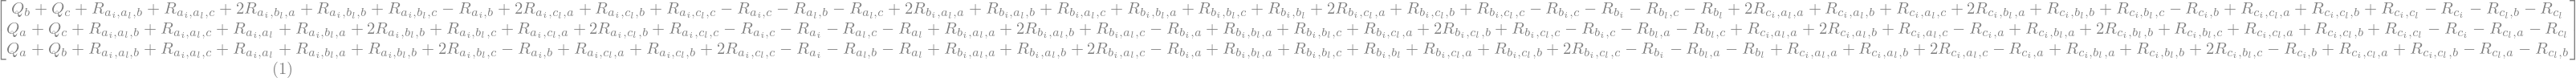

In [6]:
N=4
labels = ('a','b','c',)
classifiers = ('i','j','k','l')
m_2_ideals = ntqr.raxioms.MAxiomsIdeal(labels,classifiers,2)
any_pair = random.choice(list(itertools.combinations(classifiers,2)))
print(any_pair)
display(Matrix([m_2_ideals.m_complex[any_pair]['axioms'][label] for label in labels]))

### The use of the axioms given test responses

The above axioms are 'universal' in the sense that they apply to all multiple choice exams, irrespective of subject or domain. As the equations show, there are no parameters or variables associated with any semantics of the test. All that is required is values for sample statistics of the test. These sample statistics are divided into two parts. The observable agreements and disagreements between the classifiers. There is a combinatorial number of these, one set for each of the $N!/((N-m)!m!)$ $m$-sized subset of N classifiers. Each of those sets has $r^m$ possible question aligned decision tuples.

The second part are the unknown test statistics that would allow us to evaluate the classifiers on the test -- the label response variables. These are also combinatorial in number, but now there are {math}`R=r` of them. One for each of the {math}`r` labels for a given test. The logic of unsupervised evaluation is based on the idea that there is a set, a **variety** in the language of algebraic geometry, that satisfies these axioms. So when we have test responses at hand, the logic proceeds by filling in the values for the response variables.

But in addition, we must specify at what point in the answer key Q-tuple we are doing the search for the varieties of the axioms ideals. It makes no logical sense to consider varieties across different values of $(Q_{\ell_1}, Q_{\ell_2}, \ldots, Q_{\ell_r}).$ Statements about logical consistency of evaluations with observed test responses are **always** at a fixed point in the answer key Q-tuple.

The m=1 subset:  ('j',)


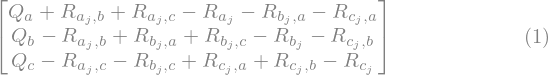

In [8]:
# Let's compare the axioms for any m=1 subset of the 4 classifiers
N=4
labels = ('a','b','c',)
classifiers = ('i','j','k')
any_m_1_subset = random.choice([m_subset for m_subset in itertools.combinations(classifiers,1)])
axioms_before_test = ntqr.raxioms.MAxiomsIdeal(labels,classifiers,1).m_complex[any_m_1_subset]["axioms"]
print("The m=1 subset: ", any_m_1_subset)
display(Matrix([axioms_before_test[label] for label in labels]))

After we have observed the test responses, these axioms are "localized" to the test. Note that we are left with only label response variables unresolved. These axioms then act as filters for accepting the possible values for these variables that are logically consistent with the test results.

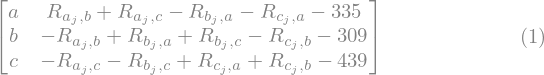

In [10]:
import ntqr.evaluations
synthetic_responses = {decisions: random.randint(1,100) for decisions in itertools.product(labels,repeat=len(classifiers))}
Q = sum(synthetic_responses.values())
qs = [random.randint(0,200) for i in range(3)]
mVarieties = ntqr.evaluations.MAxiomsVarieties(labels,classifiers,synthetic_responses,(qs[0],qs[1],qs[2],Q-sum(qs)),1)
Matrix([(label, test_axiom) for label, test_axiom in mVarieties.test_axioms[any_m_1_subset].items()])

Note how the matrix above only has label response variables. We have 'localized' the axioms to the assumed number of labels in the answer key **and** the observed test responses.

#### Looking at the varieties for binary response/classification tests.
Although NTQR supports arbitrary number of classifiers ($N=n$) and labels ($R=r$), it is simplest to consider the case of binary classification. We create some synthetic test results and look at one of the M=1 axioms before we observe test results.

In [13]:
# Let's go back to R=2 tests and create synthetic test responses.
labels = ('a','b',)
classifiers = ('i', 'j',)
synthetic_responses = {decisions: random.randint(1,5) for decisions in itertools.product(labels,repeat=len(classifiers))}
Q = sum(val for val in synthetic_responses.values())
print("Number of questions in the test: ", Q)
any_subset = random.choice([m_subset for m_subset in itertools.combinations(classifiers,1)])
axioms_before_test = ntqr.raxioms.MAxiomsIdeal(labels,classifiers,1).m_complex[any_subset]["axioms"]
any_label = random.choice(labels)
print(any_subset, " ", any_label)
Matrix([axioms_before_test[any_label]])

Number of questions in the test:  9
('j',)   a


We pick a random point on the answer-key Q-simplex and display the localized test axiom.

In [15]:
# Varieties exist at a fixed point in the answer-key simplex
qa = random.randint(1,Q)
qb = Q - qa
print("Q_a =", qa, ", Q_b =", Q - qa)
mVarieties =ntqr.evaluations.MAxiomsVarieties(labels,classifiers,synthetic_responses,(qa, qb),2)
test_axiom = mVarieties.test_axioms[any_subset][any_label]

display(Matrix([test_axiom]))

Q_a = 5 , Q_b = 4


The variety are all the label response variable values that satisfy the test axioms. It is a geometric set in the space of all possible evaluations. For binary classification, the label response simplex for a single classifier is simple - a line. In the case of binary classification we could go with either the correct or 'error' variable to do all the computations. The default in the NTQR package is to use the 'error' variables since those generalize to any number of labels. Getting the number of correct responses is trivially computed as
\begin{equation}
R_{(\ell_{\text{true}})_1, (\ell_{\text{true}})_2, \ldots, (\ell_{\text{true}})_m; \ell_{\text{true}}} = Q_{\ell_{\text{true}}} - \sum_{(l_1,l_2,\ldots,l_m) \in errors(\ell_{\text{true}})} R_{l_1,l_2,\ldots,l_m; \ell_{\text{true}}},
\end{equation}
where the 'errors' are all those decision tuples where not all classifiers are correct - the many ways that a group can disagree and agree and still have at least one member of the ensemble, if not all or many, be wrong.

In [17]:
Matrix([[[var for var in point.keys()] for point in mVarieties.variety(any_subset)][0]])

In [18]:
[[val for val in point.values()] for point in mVarieties.variety(any_subset)]

12


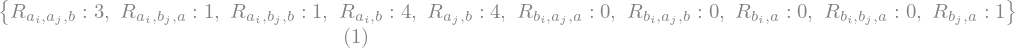

In [19]:
# Another point in the answer-key Q-simplex yields different evaluations
# for the same test results.
qa = random.randint(1,Q)
qb = Q - qa
mVarieties =ntqr.evaluations.MAxiomsVarieties(labels,classifiers,synthetic_responses,(qa,qb),2)
display(list(mVarieties.variety(('i',))))
display(list(mVarieties.variety(('j',))))
m2_points = list(mVarieties.variety(('i','j',)))
print(len(m2_points))
if len(m2_points) > 0:
    display(random.choice(m2_points))

In [20]:
# Some assumed points in the answer-key simplex cannot explain the test results -
# There are no pair responses values that satisfy the M=2 axioms.
# This tends to happen at the ends of the Q-simplex for binary classification.
mVarieties =ntqr.evaluations.MAxiomsVarieties(labels,classifiers,synthetic_responses,(Q,0),2)
display(list(mVarieties.variety(('i',))))
display(list(mVarieties.variety(('j',))))
m2_points = list(mVarieties.variety(('i','j',)))
print(len(m2_points))
if len(m2_points) > 0:
    display(random.choice(m2_points))

0


In [21]:
# Some assumed points in the answer-key simplex cannot explain the test results -
# There are no pair responses values that satisfy the M=2 axioms.
# This tends to happen at the ends of the Q-simplex for binary classification.
mVarieties =ntqr.evaluations.MAxiomsVarieties(labels,classifiers,synthetic_responses,(0,Q),2)
display(list(mVarieties.variety(('i',))))
display(list(mVarieties.variety(('j',))))
m2_points = list(mVarieties.variety(('i','j',)))
print(len(m2_points))
if len(m2_points) > 0:
    display(random.choice(m2_points))

0


84


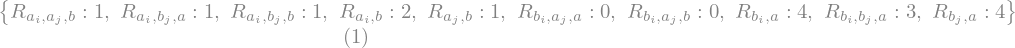

In [22]:
# But other answer-key simplex points are consistent with the observed test results. 
mVarieties =ntqr.evaluations.MAxiomsVarieties(labels,classifiers,synthetic_responses,(Q-2,2),2)
display(list(mVarieties.variety(('i',))))
display(list(mVarieties.variety(('j',))))
m2_points = list(mVarieties.variety(('i','j',)))
print(len(m2_points))
if len(m2_points) > 0:
    display(random.choice(m2_points))